# Covid-19 Analysis in Germany

### Introductons
The New `Coronavirus`, also known as `Covid-19` is an infectious disease caused by SARS-CoV-2. It is a new strain from the coronavirus family that has not been identified in humans before. Coronaviruses are a large group of viruses that infect animals. According to the US Centers for Disease and Control Prevention, they are referred to zoonotic which means in rare cases they can be transmitted from animals to humans. Coronaviruses are known to cause respiratory illnesses that range from mild illnesses like the common cold, to more severe and lethal diseases such as Severe Acute Respiratory syndrome (SARS) and Middle East Respiratory Syndrome (MERS).

`Covid-19` can cause pneumonia-like symptoms. Those infected with the virus will encounter symptoms such as dry coughs, fever, lost sense of taste or/and smell, and breathing difficulties. However the symptoms can vary depending on the patient's immune system and their underlying health conditions. While some will experience common cold- like symptoms and recover in a matter of 2 weeks, other  extreme cases it may result in organ failure and death.



Though the past outbreak of the SARS virus is more deadly with 15% fatality rate, the new coronavirus is far more transmissible and has already claimed more lives. Since the outbreak was first detected in Wohan, China in December 2019.
The outbreak was declared a global pandemic by the World Health Organization (WHO) in March 2020, affecting 219 countries and territories around the world. As a global problem with millions of people sick and a large number of new cases on a daily basis, it is realistic to encounter issues gathering such an enormous number of data, and even more so to get accurate data. It’s important to consider that many countries lack the medical supplies for a wide range of tests to achieve an accurate number of active cases. Not to mention all the people that were sick and did not get tested it is practically impossible to gather accurate data. 

In all of that uncertainty, to have a good look at the bigger picture you need to apply some analysis using statistical tools that are widely available these days to be used by any professionals in any field to help them to get an overview or insights from their data to be able to take decisions in the future with some level of efficiency and accuracy and minimize wrong decision as much as possible.

Therefore, in this project I have taken the analysis approach to get some insights on the dataset that Robert Koch-Institut collected after almost one year from the first outbreak in Germany.

In [1]:
# Starting by importing OS module to handle files on the operating system level
import os 

In [2]:
# Checking my working folder
os.listdir("./dataset/")

['archive.zip', 'covid_de.csv']

In [3]:
# Checking my dataset by opening the CSV
show_file = []
with open("./dataset/covid_de.csv") as f:
    show_file = f.readlines()
show_file[0:5]

['state,county,age_group,gender,date,cases,deaths,recovered\n',
 'Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1\n',
 'Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1\n',
 'Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1\n',
 'Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1\n']

In [4]:
# Importing the most two poweful libraries to handle data Pandas and Numpy.
import pandas as pd
import numpy as np
data_set = pd.read_csv("./dataset/covid_de.csv")
print(data_set.info())
# Having a brief summary statistical look at the dataset.
print(data_set.describe())
# Having a brief look at the dataset after extracted to DataFrame object.
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510109 entries, 0 to 510108
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   state      510109 non-null  object
 1   county     510109 non-null  object
 2   age_group  507521 non-null  object
 3   gender     498571 non-null  object
 4   date       510109 non-null  object
 5   cases      510109 non-null  int64 
 6   deaths     510109 non-null  int64 
 7   recovered  510109 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 31.1+ MB
None
               cases         deaths      recovered
count  510109.000000  510109.000000  510109.000000
mean        4.355406       0.111972       3.793950
std         6.665811       0.488713       6.364455
min         0.000000       0.000000      -1.000000
25%         1.000000       0.000000       1.000000
50%         2.000000       0.000000       2.000000
75%         5.000000       0.000000       4.000000
max       206.000000      

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [5]:
# Checking if there is anull values in the dataset.
data_set.isnull().sum()

state            0
county           0
age_group     2588
gender       11538
date             0
cases            0
deaths           0
recovered        0
dtype: int64

In [6]:
""" After checking the null values in the dataset, I found out they are empty values which can't be 
    used, I have decided to discard them. """
data_set = data_set.dropna()
data_set.isnull().sum()

state        0
county       0
age_group    0
gender       0
date         0
cases        0
deaths       0
recovered    0
dtype: int64

In [7]:
# Creating a generic function to extract categories from any dataframe.
def num_of_categories(data_frame, column_name):
    """" The function takes two arguments "data_farme" and "column_name" and it 
            returns a list of all the unique values in that column. """
    num_of_cat = set()
    for num in data_frame[column_name]:
        num_of_cat.add(str(num))
    num_of_cat = list(num_of_cat)
    num_of_cat.sort()
    return num_of_cat

In [8]:
# Extracting all the states names from the dataframe.
num_of_states = num_of_categories(data_set, "state")
num_of_states

['Baden-Wuerttemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thueringen']

In [9]:
# Extracting all the age-groups from the dataframe.
num_of_age_group = num_of_categories(data_set, "age_group")
num_of_age_group

['00-04', '05-14', '15-34', '35-59', '60-79', '80-99']

In [10]:
# Creating a generic function sum all the data for all the states in specific case in all age_group.
def sum_cases(file_path, state, case_param, age):
    """ The function takes four arguments "file_path" for the CSV that has the dataset,
        "state" which a list of all the states, "case_param" which is the case you want 
        e.g.("deaths") which also a column name and the "age" which is a list of all the
        age groups in the dataset. It returns a dictionary of all the states as keys and 
        sum of all cases in all the age groups as a list of values. """
    
    state_data = pd.read_csv(file_path)
    states_dict = {}
    for i in state:
        states_dict[i] = []
        for j in age:
            states_dict[i].append(state_data[np.logical_and(state_data["state"]==i,
                                      state_data["age_group"]==j)][case_param].sum())
    return states_dict
# Getting the sum of all the cases around Germany.
states_all_cases = sum_cases("./dataset/covid_de.csv", num_of_states, "cases", num_of_age_group)
states_all_cases

{'Baden-Wuerttemberg': [4634, 15619, 88925, 112866, 44215, 26883],
 'Bayern': [7911, 24415, 120784, 151402, 60289, 38296],
 'Berlin': [2026, 7115, 39629, 43939, 16157, 10147],
 'Brandenburg': [977, 2913, 13909, 28392, 12848, 9146],
 'Bremen': [264, 933, 5787, 5932, 2023, 1049],
 'Hamburg': [899, 2841, 16174, 16879, 5626, 3928],
 'Hessen': [2753, 8814, 52821, 65187, 24846, 17415],
 'Mecklenburg-Vorpommern': [300, 1139, 4325, 7668, 3824, 2678],
 'Niedersachsen': [3150, 9333, 44797, 52109, 19842, 13473],
 'Nordrhein-Westfalen': [9849, 30389, 152140, 184382, 67640, 41564],
 'Rheinland-Pfalz': [1696, 5073, 27543, 33941, 14072, 10192],
 'Saarland': [562, 1505, 7073, 9137, 4490, 3027],
 'Sachsen': [1558, 6199, 36509, 71859, 36181, 27818],
 'Sachsen-Anhalt': [730, 2308, 10671, 20031, 10211, 7612],
 'Schleswig-Holstein': [765, 2142, 10766, 13199, 5280, 3964],
 'Thueringen': [855, 2823, 13371, 26188, 13144, 9184]}

In [11]:
# Extract the sum of all the cases into a dataframe.
states_all_cases_frame = pd.DataFrame(states_all_cases)
# Adding a new column to the dataframe to display all the age groups.
states_all_cases_frame["age_group"] = num_of_age_group
states_all_cases_frame

,Baden-Wuerttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thueringen,age_group
0,4634,7911,2026,977,264,899,2753,300,3150,9849,1696,562,1558,730,765,855,00-04
1,15619,24415,7115,2913,933,2841,8814,1139,9333,30389,5073,1505,6199,2308,2142,2823,05-14
2,88925,120784,39629,13909,5787,16174,52821,4325,44797,152140,27543,7073,36509,10671,10766,13371,15-34
3,112866,151402,43939,28392,5932,16879,65187,7668,52109,184382,33941,9137,71859,20031,13199,26188,35-59
4,44215,60289,16157,12848,2023,5626,24846,3824,19842,67640,14072,4490,36181,10211,5280,13144,60-79
5,26883,38296,10147,9146,1049,3928,17415,2678,13473,41564,10192,3027,27818,7612,3964,9184,80-99


In [12]:
# Getting the sum of all the daeth cases around Germany.
states_death_cases_age = sum_cases("./dataset/covid_de.csv", num_of_states, "deaths", num_of_age_group)
# Extract the sum of the death cases into a dataframe.
states_death_cases_age_frame = pd.DataFrame(states_death_cases_age)
# Adding a new column to the dataframe to display all the age groups.
states_death_cases_age_frame["age_group"]= num_of_age_group
states_death_cases_age_frame

,Baden-Wuerttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thueringen,age_group
0,3,1,0,0,0,1,0,0,0,3,1,0,0,0,0,0,00-04
1,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,05-14
2,9,13,1,0,0,3,11,0,7,13,6,1,3,0,0,4,15-34
3,218,295,84,64,16,47,154,8,118,455,76,31,137,44,33,50,35-59
4,1808,2721,676,579,82,311,1299,121,869,3043,674,184,1572,477,230,572,60-79
5,5025,7360,1509,1645,169,711,3377,322,2291,7299,1768,521,4576,1191,623,1568,80-99


In [13]:
# Getting the sum of all the recovery cases around Germany.
states_recovered_cases_age = sum_cases("./dataset/covid_de.csv", num_of_states, "recovered", num_of_age_group)
# Extract the sum of all the recovered cases into a dataframe.
states_recovered_cases_age_frame = pd.DataFrame(states_recovered_cases_age)
# Adding a new column to the dataframe to display all the age groups.
states_recovered_cases_age_frame["age_group"]= num_of_age_group
states_recovered_cases_age_frame

,Baden-Wuerttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thueringen,age_group
0,4223,7209,1853,790,237,764,2471,254,2840,9009,1505,517,1340,592,652,745,00-04
1,14538,22699,6699,2575,850,2566,8129,1002,8593,28387,4581,1383,5649,1934,1881,2602,05-14
2,82141,111117,36764,12200,5254,14284,48117,3790,41544,139366,24547,6483,31849,8713,9400,12024,15-34
3,103379,138376,40120,24726,5343,14734,58692,6577,47814,167601,29813,8266,62764,15723,11364,23203,35-59
4,38357,51825,13537,10246,1677,4483,20520,3058,16879,57136,11440,3844,29567,7258,4064,10911,60-79
5,18733,26659,6998,5786,671,2587,11382,1742,9126,28216,6546,2146,18729,4229,2201,6245,80-99


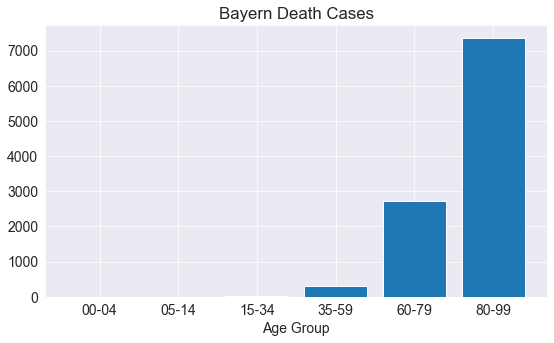

In [14]:
""" Here we come to the visualization part "one chart is better than a thousand word" they say.
    I have started with importing two of the most powerful visualization tools to apply which are 
    matplotlib and seaborn. """
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Getting the style of the charts ready.
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
# Displayed below all the death cases across age groups in Bayern as an example.
plt.bar(states_death_cases_age_frame["age_group"],states_death_cases_age_frame["Bayern"])
plt.title("Bayern Death Cases")
plt.xlabel("Age Group")
plt.show()

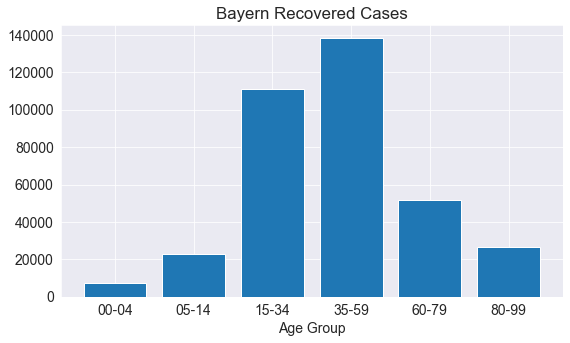

In [15]:
# Displayed below all the recovered cases across age groups in Bayern as an example.
plt.bar(states_recovered_cases_age_frame["age_group"],states_recovered_cases_age_frame["Bayern"])
plt.title("Bayern Recovered Cases")
plt.xlabel("Age Group")
plt.show()

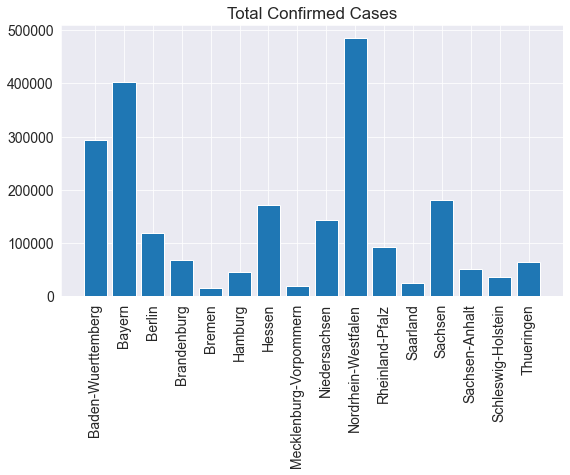

In [16]:
# Displayed below all sum of all the cases across all Germany.
plt.bar(num_of_states, states_all_cases_frame.iloc[:, :-1].apply(sum))
plt.xticks(rotation=90)
plt.title("Total Confirmed Cases")
plt.show()

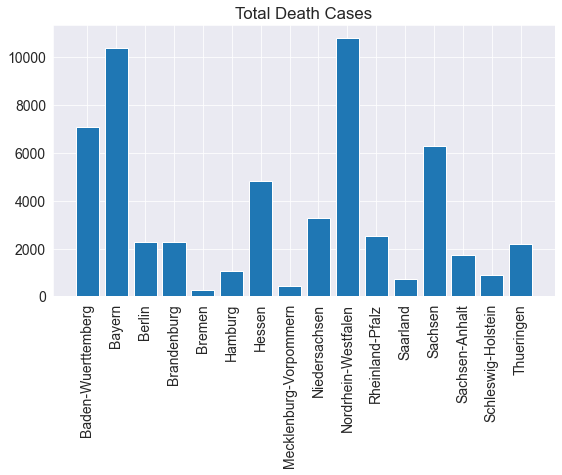

In [17]:
# Displayed below all sum of the death cases across all Germany.
plt.bar(num_of_states, states_death_cases_age_frame.iloc[:, :-1].apply(sum))
plt.xticks(rotation=90)
plt.title("Total Death Cases")
plt.show()

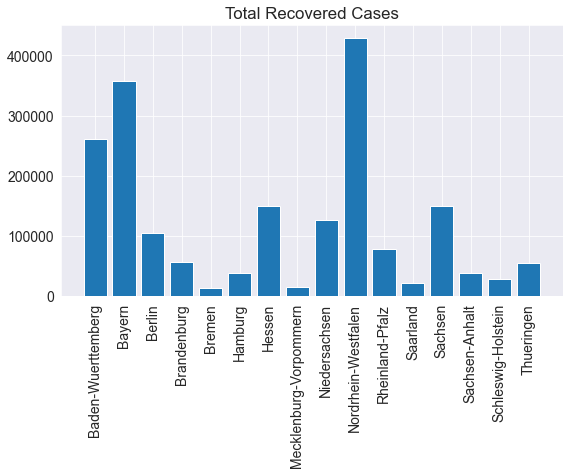

In [18]:
# Displayed below all sum of the recovered cases across all Germany.
plt.bar(num_of_states, states_recovered_cases_age_frame.iloc[:, :-1].apply(sum))
plt.xticks(rotation=90)
plt.title("Total Recovered Cases")
plt.show()

In [19]:
# Creating a generic function sum all the cases according to the age groups.
def total_cases_to_age(df):
    """ The function takes one argument "df" which is dataframe that has the cases
        according to the age groups and it returns a list of the sum of all the cases 
        across all age groups. """
    new_list = []
    for i in range(df.shape[0]):
        new_list.append(df.iloc[i,:-1].sum())
    return new_list

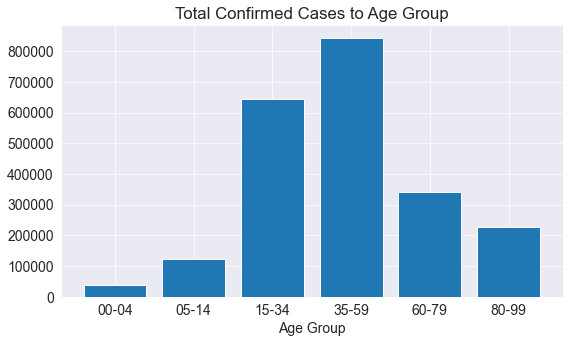

In [20]:
# Displayed below all sum of all the cases in Germany across all age groups.
total_cases = total_cases_to_age(states_all_cases_frame)
plt.bar(num_of_age_group, total_cases)
plt.title("Total Confirmed Cases to Age Group")
plt.xlabel("Age Group")
plt.show()

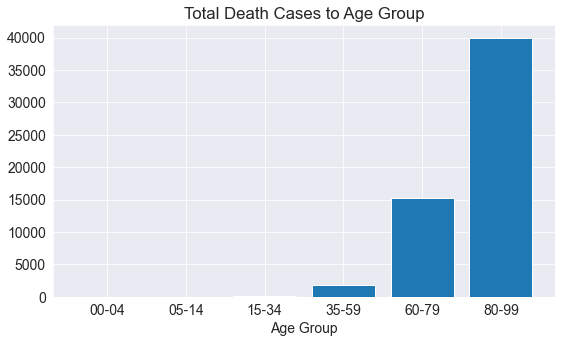

In [21]:
# Displayed below all sum of the death cases across all age groups.
total_death_cases = total_cases_to_age(states_death_cases_age_frame)
plt.bar(num_of_age_group, total_death_cases)
plt.title("Total Death Cases to Age Group")
plt.xlabel("Age Group")
plt.show()

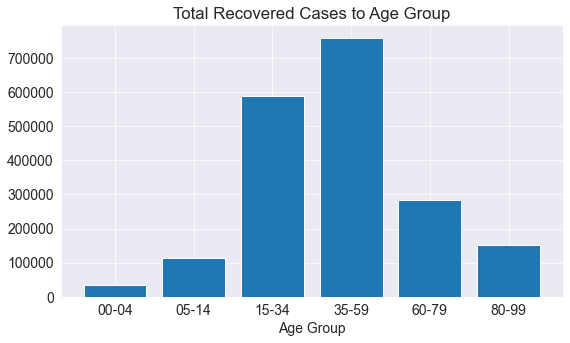

In [22]:
# Displayed below all sum of the recovered cases across all age groups.
total_recovered_cases = total_cases_to_age(states_recovered_cases_age_frame)
plt.bar(num_of_age_group, total_recovered_cases)
plt.title("Total Recovered Cases to Age Group")
plt.xlabel("Age Group")
plt.show()

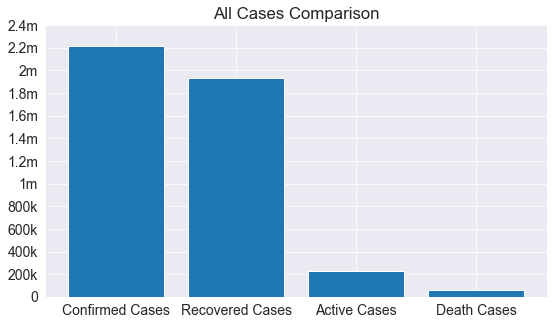

In [23]:
# Creating a list to hold the sum of all the cases.
all_cases_compared = [sum(total_cases), sum(total_recovered_cases), 
                      sum(total_cases) - (sum(total_recovered_cases) + sum(total_death_cases)),
                      sum(total_death_cases)]
# Displayed below a comparison between all the cases.
labels = ["Confirmed Cases", "Recovered Cases", "Active Cases", "Death Cases", ]
plt.bar(labels, all_cases_compared)
# Assigning yticks to make the chart much more readable.
plt.yticks((0 , 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000, 2200000, 2400000),
           ("0", "200k", "400k", "600k","800k", "1m", "1.2m", "1.4m", "1.6m", "1.8m", "2m", "2.2m", "2.4m"))
# Another way of modifying the yticks.
# plt.yticks(np.arange(0, 3000000, step=200000))
plt.title("All Cases Comparison")
plt.show()